# Test bed class

In [5]:
# containing the states and actions, and the overall rules of the test
class Testbed(object):

    def __init__(self, nArms, mean, stDev):

       
        self.nArms = nArms

        self.mean = mean        
        self.stDev = stDev      

        self.actArr = np.zeros(nArms)   # Array to store action values
        self.optim = 0                  # Store optimal value for greedy
        self.reset()

    # Reset testbed for next iteration
    def reset(self):

        self.actArr = np.random.normal(self.mean, self.stDev, self.nArms)

        self.optim = np.argmax(self.actArr)

# Agent class

In [6]:
################################################################
# Controls the agents movement and behaviour in the environment interacting with the testbed

class Agent(object):

    # Constructor
    def __init__(self,nArms, eProb=0):
        self.nArms = nArms     
        self.eProb = eProb     

        self.timeStep = 0                   
        self.lastAction = None               # Store last action

        self.kAction = np.zeros(nArms)          # count of actions taken at time t
        self.rSum = np.zeros(nArms)             # Sums number of rewards
        self.valEstimates = np.zeros(nArms)     # action value estimates sum(rewards)/Amount


    def __str__(self):
        if self.eProb == 0:
            return "Greedy"
        else:
            return "Epsilon = " + str(self.eProb)


    # Selects action based on a epsilon-greedy behaviour
    def action(self):

        # Epsilon method
        randProb = np.random.random()   # Pick random probability between 0-1
        if randProb < self.eProb:
            a = np.random.choice(len(self.valEstimates))    # Select random action

        # Greedy Method
        else:
            maxAction = np.argmax(self.valEstimates)    
           
            action = np.where(self.valEstimates == np.argmax(self.valEstimates))[0]

          
            if len(action) == 0:
                a = maxAction
            else:
                a = np.random.choice(action)

       
        self.lastAction = a
        return a


    # updates the value extimates amounts based on the last action
    def interpreter(self, reward):
        # Add 1 to the number of action taken in step
        At = self.lastAction

        self.kAction[At] += 1      
        self.rSum[At] += reward     # Add reward to sum array

        # Calculate new action-value
        self.valEstimates[At] = self.rSum[At]/self.kAction[At]

       
        self.timeStep += 1


    # Reset all variables for next iteration
    def reset(self):
        self.timeStep = 0                    
        self.lastAction = None              

        self.kAction[:] = 0                  
        self.rSum[:] = 0
        self.valEstimates[:] = 0   


# Enviroment class

In [7]:
################################################################
# Environment class to control all classes
class Environment(object):

 
    def __init__(self, testbed, agents, plays, iterations):
        self.testbed = testbed
        self.agents = agents

        self.plays = plays
        self.iterations = iterations


    def play(self):

       
        scoreArr = np.zeros((self.plays, len(self.agents)))
        
        optimlArr = np.zeros((self.plays, len(self.agents)))

        for iIter in range(self.iterations):

            # Print statement after every 100 iterations
            if (iIter%100) == 0:
                print("Completed Iterations: ",iIter)

            #Reset testbed and all agents
            self.testbed.reset()
            for agent in self.agents:
                agent.reset()


            # Loop for number of plays
            for jPlays in range(self.plays):
                agtCnt = 0

                for kAgent in self.agents:
                    actionT =  kAgent.action()

                   
                    rewardT = np.random.normal(self.testbed.actArr[actionT], scale=1)

                    # Agent checks state
                    kAgent.interpreter(reward=rewardT)

                    scoreArr[jPlays,agtCnt] += rewardT

          
                    if actionT == self.testbed.optim:
                        optimlArr[jPlays,agtCnt] += 1

                    agtCnt += 1

        scoreAvg = scoreArr/self.iterations
        optimlAvg = optimlArr/self.iterations

        return scoreAvg, optimlAvg


# Main to run all systems

Running...
Completed Iterations:  0
Completed Iterations:  100
Completed Iterations:  200
Completed Iterations:  300
Completed Iterations:  400
Completed Iterations:  500
Completed Iterations:  600
Completed Iterations:  700
Completed Iterations:  800
Completed Iterations:  900
Completed Iterations:  1000
Completed Iterations:  1100
Completed Iterations:  1200
Completed Iterations:  1300
Completed Iterations:  1400
Completed Iterations:  1500
Completed Iterations:  1600
Completed Iterations:  1700
Completed Iterations:  1800
Completed Iterations:  1900
Execution time: 72.64859819412231 seconds


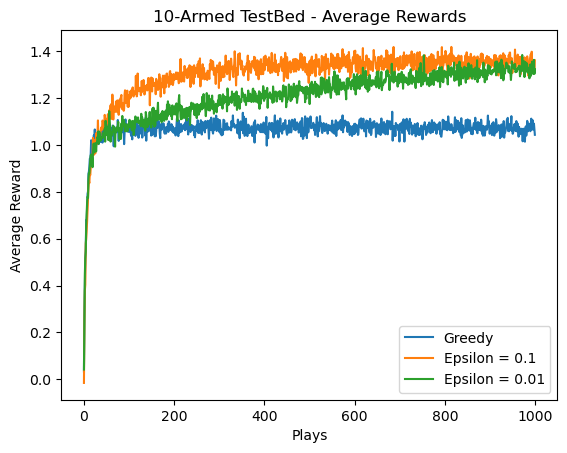

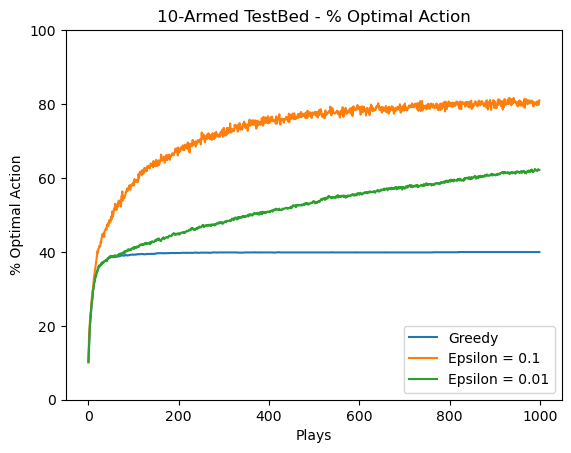

In [8]:
if __name__ == "__main__":
    start_time = time.time()    #store time to monitor execution
    nArms = 10                  # n number of bandits
    iterations = 2000         # number of repeated iterations
    plays = 1000                # number of pplays per iteration

    # Setup objects to contain infomration about the agents, testbed, and environment
    testbed = Testbed(nArms=nArms,mean=0,stDev=1)
    agents = [Agent(nArms=nArms),Agent(nArms=nArms,eProb=0.1),Agent(nArms=nArms,eProb=0.01)]
    environment = Environment(testbed=testbed,agents=agents,plays=plays,iterations=iterations)

    # Run Environment
    print("Running...")
    g1Scores, g2Optimal = environment.play()
    print("Execution time: %s seconds" % (time.time() - start_time))


    #Graph 1 - Averate rewards over all plays
    plt.title("10-Armed TestBed - Average Rewards")
    plt.plot(g1Scores)
    plt.ylabel('Average Reward')
    plt.xlabel('Plays')
    plt.legend(agents, loc=4)
    plt.show()

    #Graph 1 - optimal selections over all plays
    plt.title("10-Armed TestBed - % Optimal Action")
    plt.plot(g2Optimal * 100)
    plt.ylim(0, 100)
    plt.ylabel('% Optimal Action')
    plt.xlabel('Plays')
    plt.legend(agents, loc=4)
    plt.show()
